## Chapter 6

### Thompson_sampling.py

Current Beta Params [ 2 35] [ 17 104] [ 2 35] [ 26 127] [ 5 43] [ 3 35] [ 99 398] [ 5 42] [ 0 22]


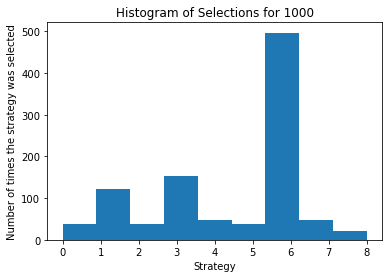

Current Beta Params [ 3 45] [ 20 129] [ 2 42] [ 38 201] [ 6 61] [ 4 51] [ 262 1034] [ 7 69] [ 0 26]


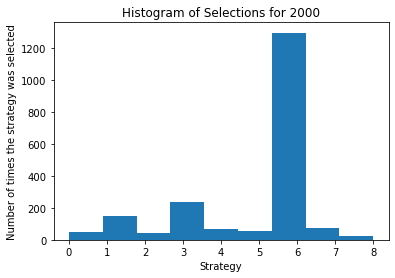

Current Beta Params [ 3 49] [ 24 150] [ 2 47] [ 47 244] [ 6 68] [ 5 58] [ 444 1743] [ 7 75] [ 0 28]


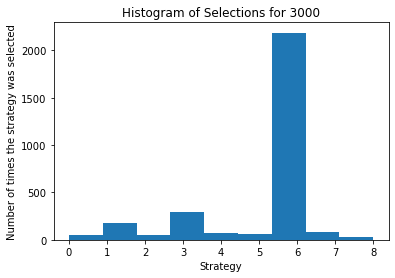

Current Beta Params [ 3 51] [ 30 177] [ 2 48] [ 59 294] [ 6 71] [ 5 63] [ 614 2461] [ 7 79] [ 0 30]


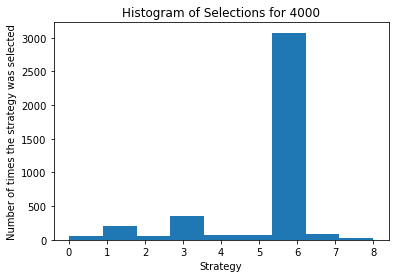

Current Beta Params [ 3 53] [ 33 193] [ 5 54] [ 77 360] [ 6 72] [ 5 67] [ 801 3154] [ 7 79] [ 0 31]


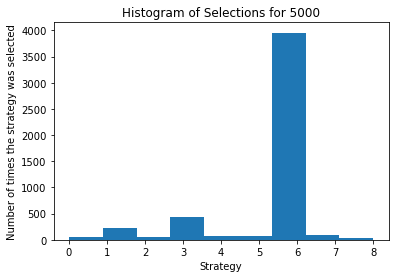

Current Beta Params [ 3 55] [ 33 200] [ 6 63] [ 86 412] [ 6 73] [ 5 67] [1000 3873] [ 7 80] [ 0 31]


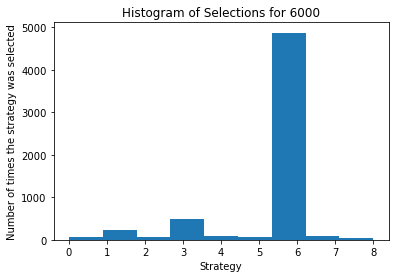

Current Beta Params [ 3 55] [ 33 208] [ 6 68] [ 87 433] [ 6 74] [ 5 70] [1197 4637] [ 7 80] [ 0 31]


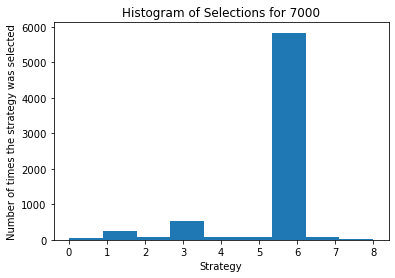

Current Beta Params [ 3 58] [ 33 211] [ 6 71] [ 95 451] [ 6 74] [ 5 70] [1370 5425] [ 7 84] [ 0 31]


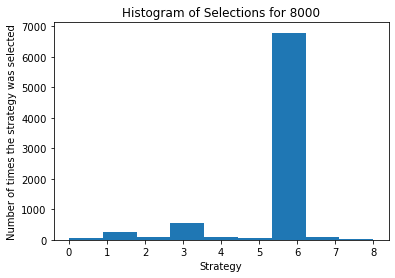

Current Beta Params [ 3 59] [ 33 214] [ 6 73] [100 487] [ 6 76] [ 5 72] [1563 6178] [ 7 85] [ 0 33]


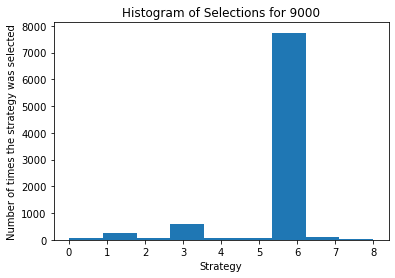

Current Beta Params [ 3 59] [ 33 218] [ 7 75] [105 507] [ 7 78] [ 5 73] [1769 6935] [ 7 86] [ 0 33]


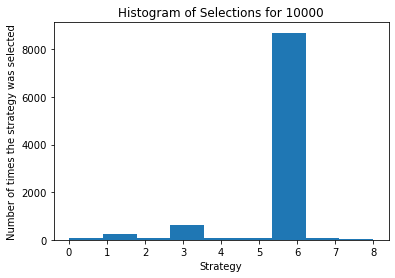

Relative Return vs. Random selection: 102 %
Relative Return vs. UCB selection: 27 %


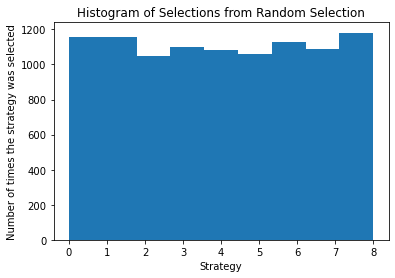

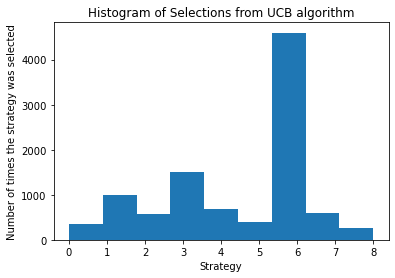

In [50]:
# AI for Sales & Advertizing - Sell like the Wolf of AI Street

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Setting the parameters
N = 10000 # 10000
d = 9

# Building the environment inside a simulation
conversion_rates = [0.05,0.13,0.09,0.16,0.11,0.04,0.20,0.08,0.01]
X = np.array(np.zeros([N,d]))
for i in range(N):
    for j in range(d):
        if np.random.rand() <= conversion_rates[j]:
            X[i,j] = 1

# Implementing Random Selection, UCB Selection and Thompson Sampling
strategies_selected_rs = []
strategies_selected_us = []
strategies_selected_ts = []
total_reward_rs = 0
total_reward_us = 0
sum_rewards_ucb = [0] * 9
numbers_of_selected_ucb = [0] * 9
total_reward_ts = 0
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
for n in range(0, N):
    # Random Selection
    strategy_rs = random.randrange(d)
    strategies_selected_rs.append(strategy_rs)
    reward_rs = X[n, strategy_rs]
    total_reward_rs = total_reward_rs + reward_rs
    
    # UCB1 Selection
    strategy_us = 0
    max_ucb = sum_rewards_ucb[0] / max(numbers_of_selected_ucb[0],1) + np.sqrt(2*np.log(max(n,1))/max(numbers_of_selected_ucb[0],1))
    for i in range(1, d):
        i_ucb = sum_rewards_ucb[i] / max(numbers_of_selected_ucb[i],1) + np.sqrt(2*np.log(max(n,1))/max(numbers_of_selected_ucb[i],1))
        if i_ucb > max_ucb:
            max_ucb = i_ucb
            strategy_us = i

    reward_us = X[n, strategy_us]
    sum_rewards_ucb[strategy_us] = sum_rewards_ucb[strategy_us] + reward_us
    numbers_of_selected_ucb[strategy_us] = numbers_of_selected_ucb[strategy_us] + 1
    strategies_selected_us.append(strategy_us)
    total_reward_us = total_reward_us + reward_us
    
    # Thompson Sampling
    strategy_ts = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            strategy_ts = i
    reward_ts = X[n, strategy_ts]
    if reward_ts == 1:
        numbers_of_rewards_1[strategy_ts] = numbers_of_rewards_1[strategy_ts] + 1
    else:
        numbers_of_rewards_0[strategy_ts] = numbers_of_rewards_0[strategy_ts] + 1
    strategies_selected_ts.append(strategy_ts)
    total_reward_ts = total_reward_ts + reward_ts
    
    if n % 1000 == 999:
        print('Current Beta Params '+' '.join(map(str, np.vstack((numbers_of_rewards_1, numbers_of_rewards_0)).T)))
        plt.hist(strategies_selected_ts, d)
        plt.title('Histogram of Selections for ' + str(n+1))
        plt.xlabel('Strategy')
        plt.ylabel('Number of times the strategy was selected')
        plt.show()
        

# Computing the Relative Return
relative_return1 = (total_reward_ts - total_reward_rs) / total_reward_rs * 100
print("Relative Return vs. Random selection: {:.0f} %".format(relative_return1))

relative_return2 = (total_reward_ts - total_reward_us) / total_reward_us * 100
print("Relative Return vs. UCB selection: {:.0f} %".format(relative_return2))

# Plotting the Histogram of Random Selections
plt.hist(strategies_selected_rs, d)
plt.title('Histogram of Selections from Random Selection')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show()

# Plotting the Histogram of UCB Selections
plt.hist(strategies_selected_us, d)
plt.title('Histogram of Selections from UCB algorithm')
plt.xlabel('Strategy')
plt.ylabel('Number of times the strategy was selected')
plt.show()
